# Loading Data

In [44]:
# Import necessary libraries
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
import re

In [45]:
# Load dataset
data = pd.read_csv(r"C:\Users\briaa\Downloads\complete_dataset (1).csv")

data.head()

,topic,source,bias,url,title,date,authors,content,content_original,source_url,bias_text,ID
0,terrorism,New York Times - News,0,http://www.nytimes.com/2016/09/20/nyregion/ahm...,"Bomb Suspect Changed After Trip Abroad, Friend...",2016-09-20,N. R. Kleinfield,"Besides his most recent trip to Quetta , Mr. R...","Besides his most recent trip to Quetta, Mr. Ra...",www.nytimes.com,left,004Gt3gcsotuiYmz
1,supreme_court,Vox,0,https://www.vox.com/policy-and-politics/2018/9...,Why Susan Collins claims she’s being bribed ov...,2018-09-12,"Emily Stewart, Terry Nguyen, Rebecca Jennings,...",Is Maine Republican Sen. Susan Collins being b...,Is Maine Republican Sen. Susan Collins being b...,www.vox.com,left,00eP4XD3VdMmHITE
2,education,Ezra Klein,0,http://www.npr.org/blogs/thetwo-way/2014/05/06...,Poll: Prestigious Colleges Won't Make You Happ...,2014-05-06,Anya Kamenetz,Poll : Prestigious Colleges Wo n't Make You Ha...,Poll: Prestigious Colleges Won't Make You Happ...,www.npr.org,left,00FTGIZEd6B8zQ4U
3,us_house,Breitbart News,2,http://www.breitbart.com/big-government/2017/0...,Paul Ryan Reportedly Says No Chance for Border...,2017-09-12,Ian Mason,"House Speaker Paul Ryan , at a private dinner ...","House Speaker Paul Ryan, at a private dinner e...",www.breitbart.com,right,00HGGqBRf1kzPRlg
4,white_house,Guest Writer - Left,0,https://www.cnn.com/2019/07/11/politics/donald...,OPINION: Trump seeking change of legal fortune...,2019-07-11,Analysis Stephen Collinson,( CNN ) President Donald Trump has reason to h...,(CNN) President Donald Trump has reason to hop...,www.cnn.com,left,00IzI5ynahBVtC9l


In [46]:
# Print column names
data.columns

Index(['topic', 'source', 'bias', 'url', 'title', 'date', 'authors', 'content',
       'content_original', 'source_url', 'bias_text', 'ID'],
      dtype='object')

In [47]:
# Extract only bias and original content for modeling 
df = data[['bias', 'content_original']]

df.columns

Index(['bias', 'content_original'], dtype='object')

In [48]:
# Check null count
df.isnull().sum()

bias                0
content_original    0
dtype: int64

# Data Preparation

In [49]:
# Text lowercase function
def lower_text(text):
    text = text.lower()  
    return text

# Apply lower_text
df['content_original'] = data['content_original'].apply(lower_text)

df.head()

C:\Users\briaa\AppData\Local\Temp/ipykernel_4832/490830834.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['content_original'] = data['content_original'].apply(lower_text)


,bias,content_original
0,0,"besides his most recent trip to quetta, mr. ra..."
1,0,is maine republican sen. susan collins being b...
2,0,poll: prestigious colleges won't make you happ...
3,2,"house speaker paul ryan, at a private dinner e..."
4,0,(cnn) president donald trump has reason to hop...


In [50]:
# Remove special characters function
def special_char(text):
    pattern = r'[^a-zA-Z0-9\s]'
    cleaned_text = re.sub(pattern, '', text)
    return cleaned_text

# Apply special_char
df['content_original'] = df['content_original'].apply(special_char)

df.head()

C:\Users\briaa\AppData\Local\Temp/ipykernel_4832/533461868.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['content_original'] = df['content_original'].apply(special_char)


,bias,content_original
0,0,besides his most recent trip to quetta mr raha...
1,0,is maine republican sen susan collins being br...
2,0,poll prestigious colleges wont make you happie...
3,2,house speaker paul ryan at a private dinner ea...
4,0,cnn president donald trump has reason to hope ...


In [51]:
# Define a function to check if special characters are present in a string
def has_special_characters(column):
    pattern = r'[^a-zA-Z0-9\s]'
    for text in column:
        if re.search(pattern, text):
            return True
    return False

# Apply the function 
has_special_characters(df['content_original'])

False

In [52]:
# Create word count function
def get_word_count(tokens):
    return len(tokens)

# Apply function to  get word count for top 5 rows
df['tokens'].head().apply(get_word_count)

KeyError: 'tokens'

In [53]:
# Tokenization
df['tokens'] = df['content_original'].apply(word_tokenize)

df.head()

C:\Users\briaa\AppData\Local\Temp/ipykernel_4832/921233451.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tokens'] = df['content_original'].apply(word_tokenize)


,bias,content_original,tokens
0,0,besides his most recent trip to quetta mr raha...,"[besides, his, most, recent, trip, to, quetta,..."
1,0,is maine republican sen susan collins being br...,"[is, maine, republican, sen, susan, collins, b..."
2,0,poll prestigious colleges wont make you happie...,"[poll, prestigious, colleges, wont, make, you,..."
3,2,house speaker paul ryan at a private dinner ea...,"[house, speaker, paul, ryan, at, a, private, d..."
4,0,cnn president donald trump has reason to hope ...,"[cnn, president, donald, trump, has, reason, t..."


In [ ]:

# Apply function
df['tokens'].head().apply(get_word_count)

0     432
1    1238
2     702
3     854
4    1523
Name: tokens, dtype: int64

In [ ]:
import re
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\briaa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [54]:
# Download NLTK stopwords if not already downloaded
import nltk
from nltk.corpus import stopwords

# Function to remove stop words from text
def remove_stop_words(tokens):
    # Initialize stop words
    stop_words = set(stopwords.words('english'))
    # Remove stop words
    filtered_tokens = [token for token in tokens if token.lower() not in stop_words]
    return filtered_tokens

# Apply the function to the 'content_original' column
df['tokens'] = df['tokens'].apply(remove_stop_words)

C:\Users\briaa\AppData\Local\Temp/ipykernel_4832/13543262.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tokens'] = df['tokens'].apply(remove_stop_words)


In [ ]:
# Check word count
df['tokens'].head().apply(get_word_count)

0    247
1    700
2    410
3    466
4    897
Name: tokens, dtype: int64

In [ ]:
# Perform lemmatization
lemmatizer = WordNetLemmatizer()
df['tokens'] = df['tokens'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])

C:\Users\briaa\AppData\Local\Temp/ipykernel_4832/291068975.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tokens'] = df['tokens'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])


In [ ]:
# Check word count
df['tokens'].head().apply(get_word_count)

0    247
1    700
2    410
3    466
4    897
Name: tokens, dtype: int64

In [ ]:
df.head()

,bias,content_original,tokens
0,0,besides his most recent trip to quetta mr raha...,"[besides, recent, trip, quetta, mr, rahami, vi..."
1,0,is maine republican sen susan collins being br...,"[maine, republican, sen, susan, collins, bribe..."
2,0,poll prestigious colleges wont make you happie...,"[poll, prestigious, colleges, wont, make, happ..."
3,2,house speaker paul ryan at a private dinner ea...,"[house, speaker, paul, ryan, private, dinner, ..."
4,0,cnn president donald trump has reason to hope ...,"[cnn, president, donald, trump, reason, hope, ..."


In [ ]:
df.shape[0]

37554

# BOW DNN Model


In [55]:
# import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, Bidirectional, GlobalMaxPooling1D
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.sequence import pad_sequences 

In [56]:
# Join the tokenized words into a single string for each document
df['text'] = df['tokens'].apply(lambda x: ' '.join(x))  

C:\Users\briaa\AppData\Local\Temp/ipykernel_4832/2384337605.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text'] = df['tokens'].apply(lambda x: ' '.join(x))


In [57]:
# Prepare the data for bag-of-words
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['text'])  # Assuming 'tokens' column contains tokenized text
y = df['bias']

In [58]:
# Split the dataset into training, validation, and testing sets
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.1, random_state=42)

In [59]:
# Encode target variable
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)
y_test_encoded = label_encoder.transform(y_test)

In [60]:
# Import necessary libraries
import tensorflow as tf

In [61]:
# Convert sparse matrices to COO format
X_train_coo = X_train.tocoo()
X_val_coo = X_val.tocoo()
X_test_coo = X_test.tocoo()

# Sort the indices
sort_indices_train = np.lexsort((X_train_coo.row, X_train_coo.col))
sort_indices_val = np.lexsort((X_val_coo.row, X_val_coo.col))
sort_indices_test = np.lexsort((X_test_coo.row, X_test_coo.col))

X_train_indices_sorted = np.column_stack((X_train_coo.row[sort_indices_train], X_train_coo.col[sort_indices_train]))
X_val_indices_sorted = np.column_stack((X_val_coo.row[sort_indices_val], X_val_coo.col[sort_indices_val]))
X_test_indices_sorted = np.column_stack((X_test_coo.row[sort_indices_test], X_test_coo.col[sort_indices_test]))

# Convert COO format to SparseTensor
X_train_sparse = tf.sparse.SparseTensor(
    indices=X_train_indices_sorted,
    values=X_train_coo.data[sort_indices_train],
    dense_shape=X_train_coo.shape
)

X_val_sparse = tf.sparse.SparseTensor(
    indices=X_val_indices_sorted,
    values=X_val_coo.data[sort_indices_val],
    dense_shape=X_val_coo.shape
)

X_test_sparse = tf.sparse.SparseTensor(
    indices=X_test_indices_sorted,
    values=X_test_coo.data[sort_indices_test],
    dense_shape=X_test_coo.shape
)

In [62]:
# Reorder the SparseTensor objects
X_train_reordered = tf.sparse.reorder(X_train_sparse)
X_val_reordered = tf.sparse.reorder(X_val_sparse)
X_test_reordered = tf.sparse.reorder(X_test_sparse)


In [66]:
# Import necessary libraries
from tensorflow.keras.layers import Dropout

# Define the DNN model architecture with two hidden layers
model = Sequential([
    Dense(256, activation='relu', input_shape=(X_train_reordered.shape[1],)),
    Dropout(0.5),  # Add dropout after the first hidden layer
    Dense(128, activation='relu'),
    Dropout(0.5),  # Add dropout after the second hidden layer
    Dense(64, activation='relu'),
    Dense(3, activation='softmax')  # Output layer with 3 neurons for 3 classes
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Import necessary libraries
from tensorflow.keras.callbacks import ModelCheckpoint



# Train the model with validation data
history = model.fit(X_train_reordered, y_train_encoded, epochs=10,batch_size=16, validation_data=(X_val_reordered, y_val_encoded), verbose=1)


Epoch 1/10
1690/1690 [==============================] - 1100s 650ms/step - loss: 0.7917 - accuracy: 0.6549 - val_loss: 0.5409 - val_accuracy: 0.7967
Epoch 2/10
1690/1690 [==============================] - 1064s 630ms/step - loss: 0.4795 - accuracy: 0.8211 - val_loss: 0.5291 - val_accuracy: 0.7937
Epoch 3/10
1690/1690 [==============================] - 876s 518ms/step - loss: 0.3235 - accuracy: 0.8845 - val_loss: 0.5025 - val_accuracy: 0.8020
Epoch 4/10
1690/1690 [==============================] - 984s 582ms/step - loss: 0.2395 - accuracy: 0.9196 - val_loss: 0.5213 - val_accuracy: 0.8063
Epoch 5/10
1690/1690 [==============================] - 867s 513ms/step - loss: 0.1816 - accuracy: 0.9426 - val_loss: 0.5553 - val_accuracy: 0.8113
Epoch 6/10
1690/1690 [==============================] - 892s 528ms/step - loss: 0.1408 - accuracy: 0.9540 - val_loss: 0.6320 - val_accuracy: 0.8063
Epoch 7/10
1690/1690 [==============================] - 798s 472ms/step - loss: 0.1194 - accuracy: 0.9627 - va

In [67]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test_reordered, y_test_encoded, verbose=2)

# Print the test loss and accuracy
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")

235/235 - 3s - loss: 0.7470 - accuracy: 0.8137 - 3s/epoch - 12ms/step
Test Loss: 0.746978223323822, Test Accuracy: 0.8137398362159729


In [68]:
import matplotlib.pyplot as plt

def plot_learning(history):
    tgts = ['loss', 'accuracy']
    vtgts = ['val_loss', 'val_accuracy']
    labels = ['Training', 'Validation']

    plt.figure(figsize=(12, 5))

    for i, (tgt, val_tgt) in enumerate(zip(tgts, vtgts)):
        plt.subplot(1, 2, i+1)
        plt.plot(history.history[tgt], label=f'{labels[0]} {tgt.capitalize()}', color='blue', linestyle='-')
        plt.plot(history.history[val_tgt], label=f'{labels[1]} {tgt.capitalize()}', color='orange', linestyle='--')
        plt.xlabel('Epoch', fontsize=12)
        plt.ylabel(tgt.capitalize(), fontsize=12)
        plt.legend(fontsize=10)
        plt.title(f"{tgt.capitalize()} Comparison", fontsize=14)
        plt.grid(True, linestyle='--', alpha=0.7)

    plt.tight_layout()
    plt.show()


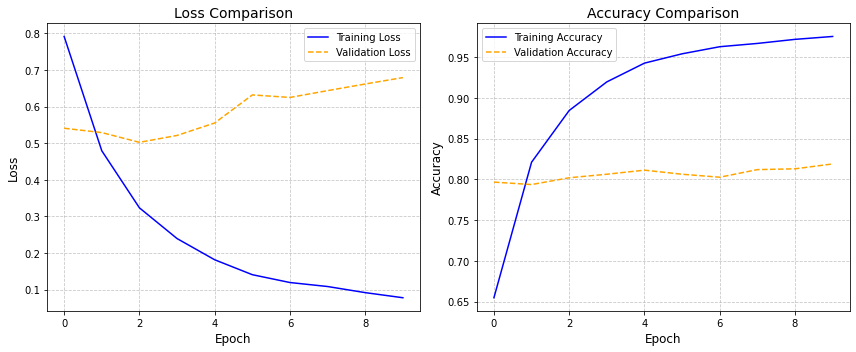

In [69]:
plot_learning(history)

# Hyperparameter Tuning

In [ ]:
# Import necessary libraries
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score

In [ ]:
# Define the DNN model architecture
def create_model(dropout_rate_1=0.5, dropout_rate_2=0.5, neurons_1=256, neurons_2=128):
    model = Sequential([
        Dense(neurons_1, activation='relu', input_shape=(X_train_reordered.shape[1],)),
        Dropout(dropout_rate_1),
        Dense(neurons_2, activation='relu'),
        Dropout(dropout_rate_2),
        Dense(64, activation='relu'),
        Dense(3, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model


In [ ]:
# Define hyperparameters to search
param_dist = {
    'dropout_rate_1': [0.3, 0.4, 0.5],
    'dropout_rate_2': [0.3, 0.4, 0.5],
    'neurons_1': [128, 256, 512],
    'neurons_2': [64, 128, 256]
}

best_accuracy = 0
best_params = {}

In [ ]:
# Perform random search
for _ in range(3):  # 10 iterations for random search
    # Randomly select hyperparameters
    params = {param: np.random.choice(values) for param, values in param_dist.items()}
    
    # Create and compile the model
    model = create_model(**params)
    
    # Train the model
    history = model.fit(X_train_reordered, y_train_encoded, epochs=10, batch_size=16, verbose=0)
    
    # Evaluate the model
    y_pred = np.argmax(model.predict(X_val_reordered), axis=1)
    accuracy = accuracy_score(y_val_encoded, y_pred)
    
    # Update best parameters if better accuracy is achieved
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_params = params

# Get the best parameters and the corresponding accuracy
print("Best Parameters:", best_params)
print("Best Accuracy:", best_accuracy)